In [2]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from utils import *
import glob

In [3]:
d='/glade/derecho/scratch/djk2120/postp/jas/'
dvs=['PREC','ET','SOILWATER_10CM','TSA','TREFHT_global']
ds=xr.Dataset()
for v in dvs:
    print(v)
    files=sorted(glob.glob(d+v+'*.nc'))
    ds[v]=xr.open_mfdataset(files,combine='by_coords')[v]
ds=ds.sel(year=slice(1970,2100))

PREC
ET
SOILWATER_10CM
TSA
TREFHT_global


In [11]:
t=ds.TREFHT_global.mean(dim='ens').rolling({'year':20},center=True).mean()
t=t-t.sel(year=1980)

In [41]:
q=0.05


In [66]:
colors=['#35978f','#dfc27d','#bf812d','#8c510a']



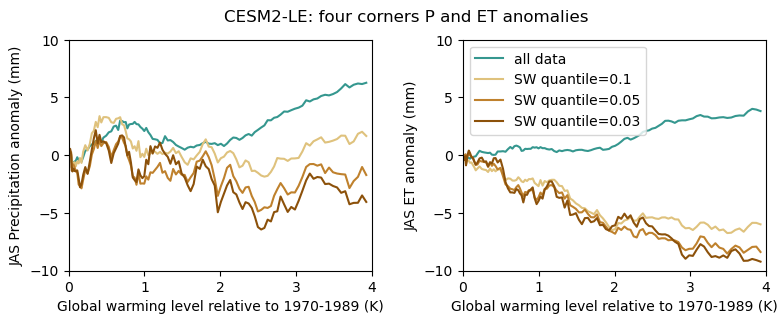

In [68]:
plt.figure(figsize=[9,3])
for q,c in zip([1,0.1,0.05,0.03],colors):
    s=ds.SOILWATER_10CM
    ix=s<=s.quantile(q,dim='ens')
    p=24*60*60*92*ds.PREC.where(ix).mean(dim='ens').rolling({'year':20},center=True).mean()
    p=p-p.sel(year=1980)
    et=24*60*60*92*ds.ET.where(ix).mean(dim='ens').rolling({'year':20},center=True).mean()
    et=et-et.sel(year=1980)
    if q<1:
        lab='SW quantile='+str(q)
    else:
        lab='all data'
    plt.subplot(121)
    plt.plot(t,p,label=lab,color=c)
    plt.ylabel('JAS Precipitation anomaly (mm)')
    plt.subplot(122)
    plt.plot(t,et,label=lab,color=c)
    plt.ylabel('JAS ET anomaly (mm)')
    plt.legend(loc=2)
for i in range(2):
    plt.subplot(121+i)
    plt.ylim([-10,10])
    plt.xlim([0,4])
    plt.yticks(range(-10,11,5))
    plt.xlabel('Global warming level relative to 1970-1989 (K)');

plt.suptitle('CESM2-LE: four corners P and ET anomalies');
plt.subplots_adjust(wspace=0.3)
plt.savefig('../figs/main/anomalies.png',dpi=300,bbox_inches='tight')


In [105]:
sw=ds.SOILWATER_10CM

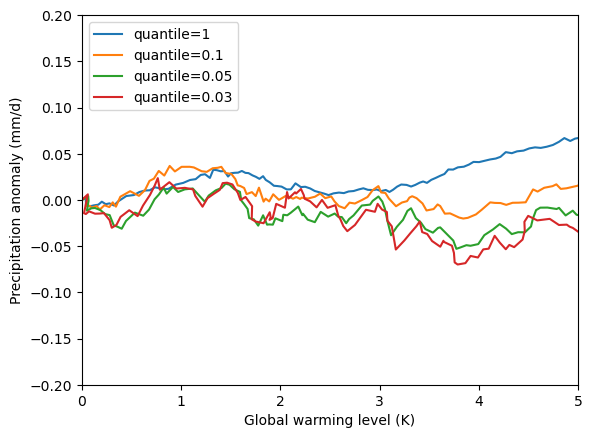

In [137]:
for qq in [1,0.1,0.05,0.03]: #
    ix=(sw<=sw.quantile(qq,dim='ens')).stack({'ey':['year','ens']}).compute()

    t=ds.TSA.stack({'ey':['year','ens']}).isel(ey=ix)
    t0=t.isel(ey=t.year<1990).mean()
    x=(t-t0).unstack().mean(dim='ens').rolling(year=20,center=True).mean()
    p=24*60*60*ds.PREC.stack({'ey':['year','ens']}).isel(ey=ix)
    p0=p.isel(ey=p.year<1990).mean()
    y=(p-p0).unstack().mean(dim='ens').rolling(year=20,center=True).mean()
    
    plt.plot(x,y,label='quantile='+str(qq))

    

plt.ylim([-0.2,0.2])
plt.xlim([0,5])
plt.legend(loc=2)
plt.ylabel('Precipitation anomaly (mm/d)')
plt.xlabel('Global warming level (K)');

plt.savefig('../figs/p_vs_tland.png',dpi=300,bbox_inches='tight')

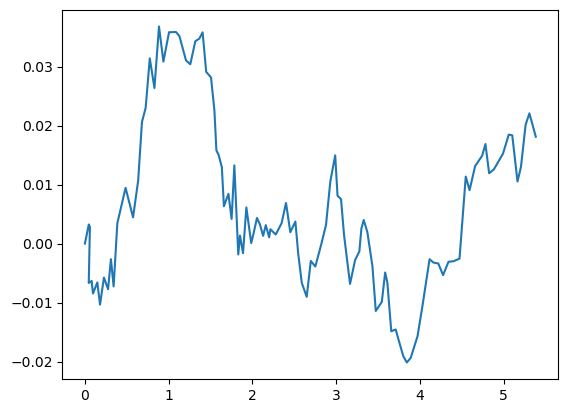

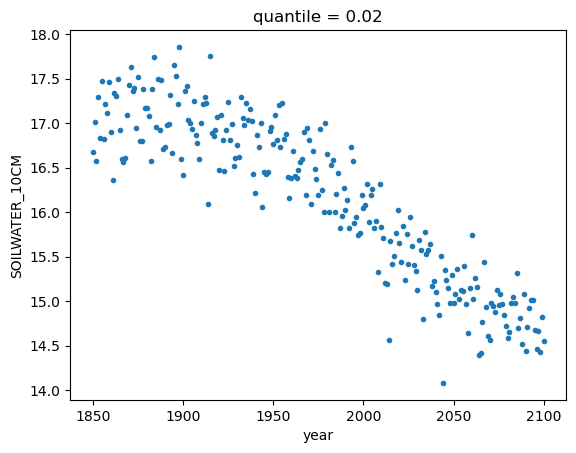

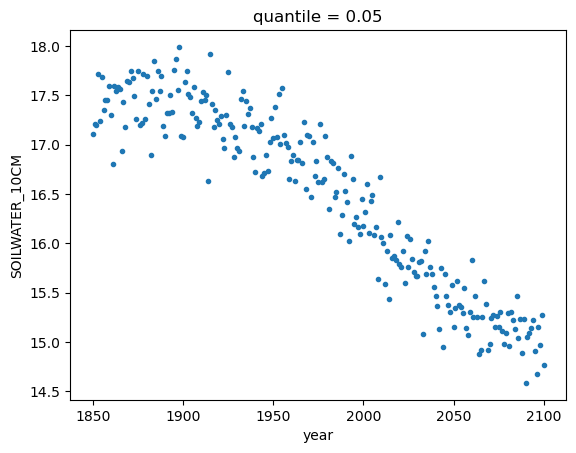

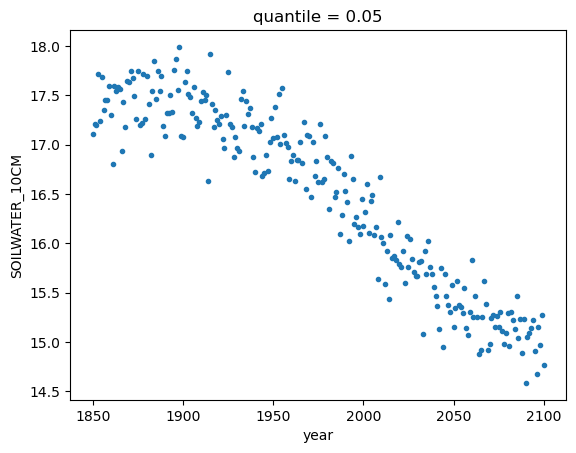

In [42]:
ix=(sw<sw.chunk(dict(ey=-1)).quantile(0.05)).compute()

(array([ 7.,  7.,  7.,  7.,  7., 15.,  8., 11., 18., 13.]),
 array([1970. , 1971.9, 1973.8, 1975.7, 1977.6, 1979.5, 1981.4, 1983.3,
        1985.2, 1987.1, 1989. ]),
 <BarContainer object of 10 artists>)

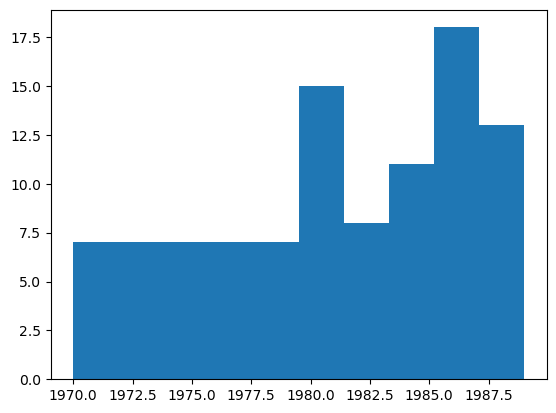

In [44]:
plt.hist(sw.year.isel(ey=ix))

In [12]:
p=24*60*60*ds.PREC
p0=p.sel(year=slice(1970,1989)).mean()

In [21]:
pp=(p-p0).mean(dim='ens').rolling(year=20,center=True).mean()

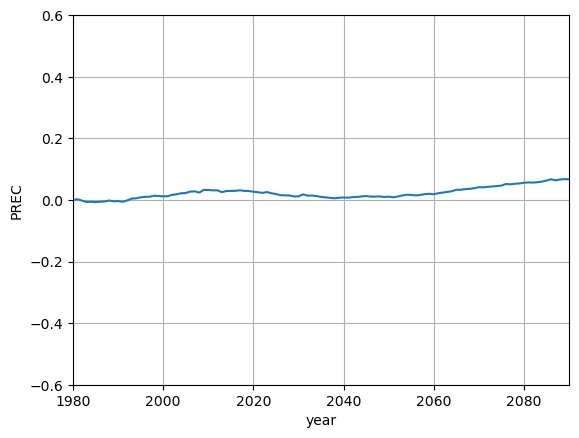

In [28]:
pp.plot()
plt.ylim([-0.6,0.6])
plt.xlim([1980,2090])
plt.grid()

In [9]:
p0.values

array(1.40163837)